#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>


## Spectral clustering. Ejemplo 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image
import cv2
import matplotlib.pylab as pylab

%matplotlib inline

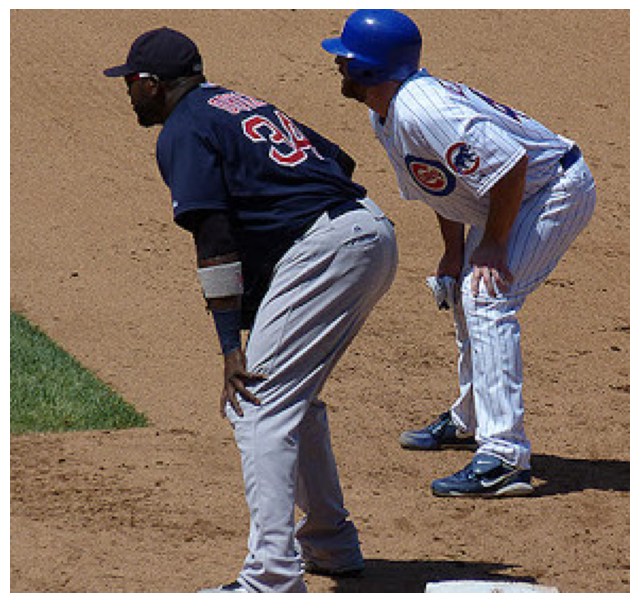

In [13]:
im_orig = imread('../data/baseball2.jpg')
pylab.figure(figsize=(8,8))
pylab.axis('off')
pylab.imshow(im_orig);

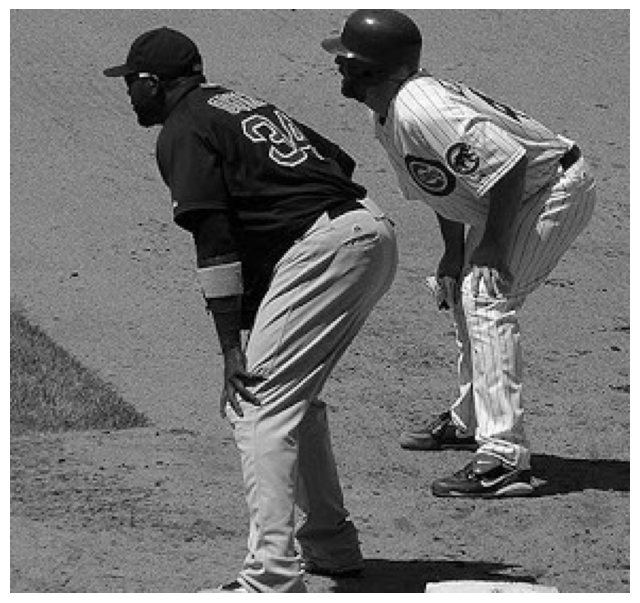

In [14]:
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(8,8))
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray);

Trabajaremos con una imagen de $100\times 100$. ¿Cómo construyo $X$? Lo verás próximamente...

In [15]:
resized_im = Image.fromarray(imread('../data/baseball2.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

In [16]:
#construye X tomando el valor de cada canal, en cada pixel
print('imagen \n',im[:3,:3,:])
print('Arreglo \n',X[:3,])

imagen 
 [[[159 127 100]
  [155 124  97]
  [157 126  98]]

 [[156 124  99]
  [157 125 100]
  [157 126 100]]

 [[156 125  96]
  [159 128 100]
  [156 125  97]]]
Arreglo 
 [[159 127 100]
 [155 124  97]
 [157 126  98]]


In [17]:
X.shape

(10000, 3)

In [18]:
im.shape

(100, 100, 3)

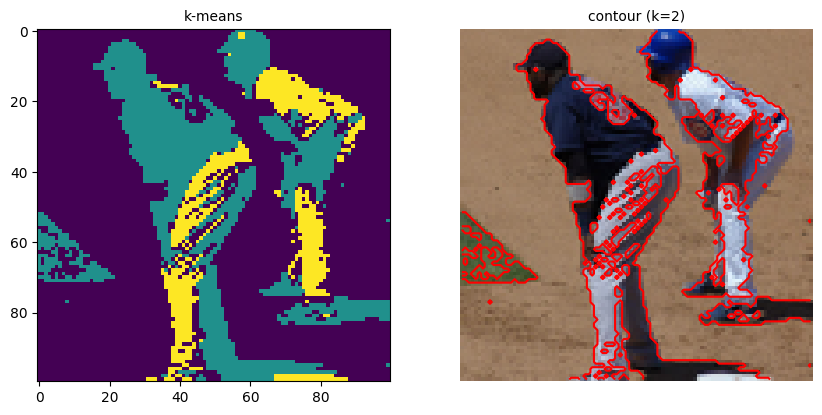

In [26]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10, n_init = 'auto')
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(10,10))
pylab.subplot(121)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=10)
pylab.subplot(122)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off')
pylab.title('contour (k=2)', size=10);

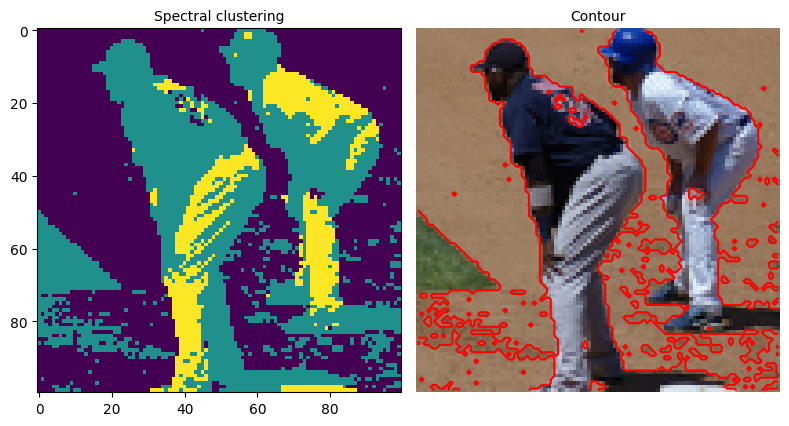

In [30]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=400, random_state=10)
spectral.fit(X) 

y_pred = spectral.labels_.astype(int)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(8,8))
pylab.subplot(121)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('Spectral clustering', size=10)
pylab.subplot(122)
pylab.imshow(im), 
pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour', size=10), pylab.tight_layout()
pylab.show()

## Spectral clustering e imágenes. Ejemplo 2

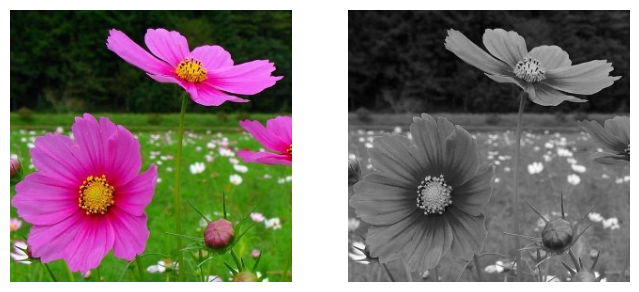

In [34]:
im_orig = imread('../data/flower2.jpg')
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.axis('off')
pylab.imshow(im_orig)
pylab.subplot(122)
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray);

In [36]:
resized_im = Image.fromarray(imread('../data/flower2.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

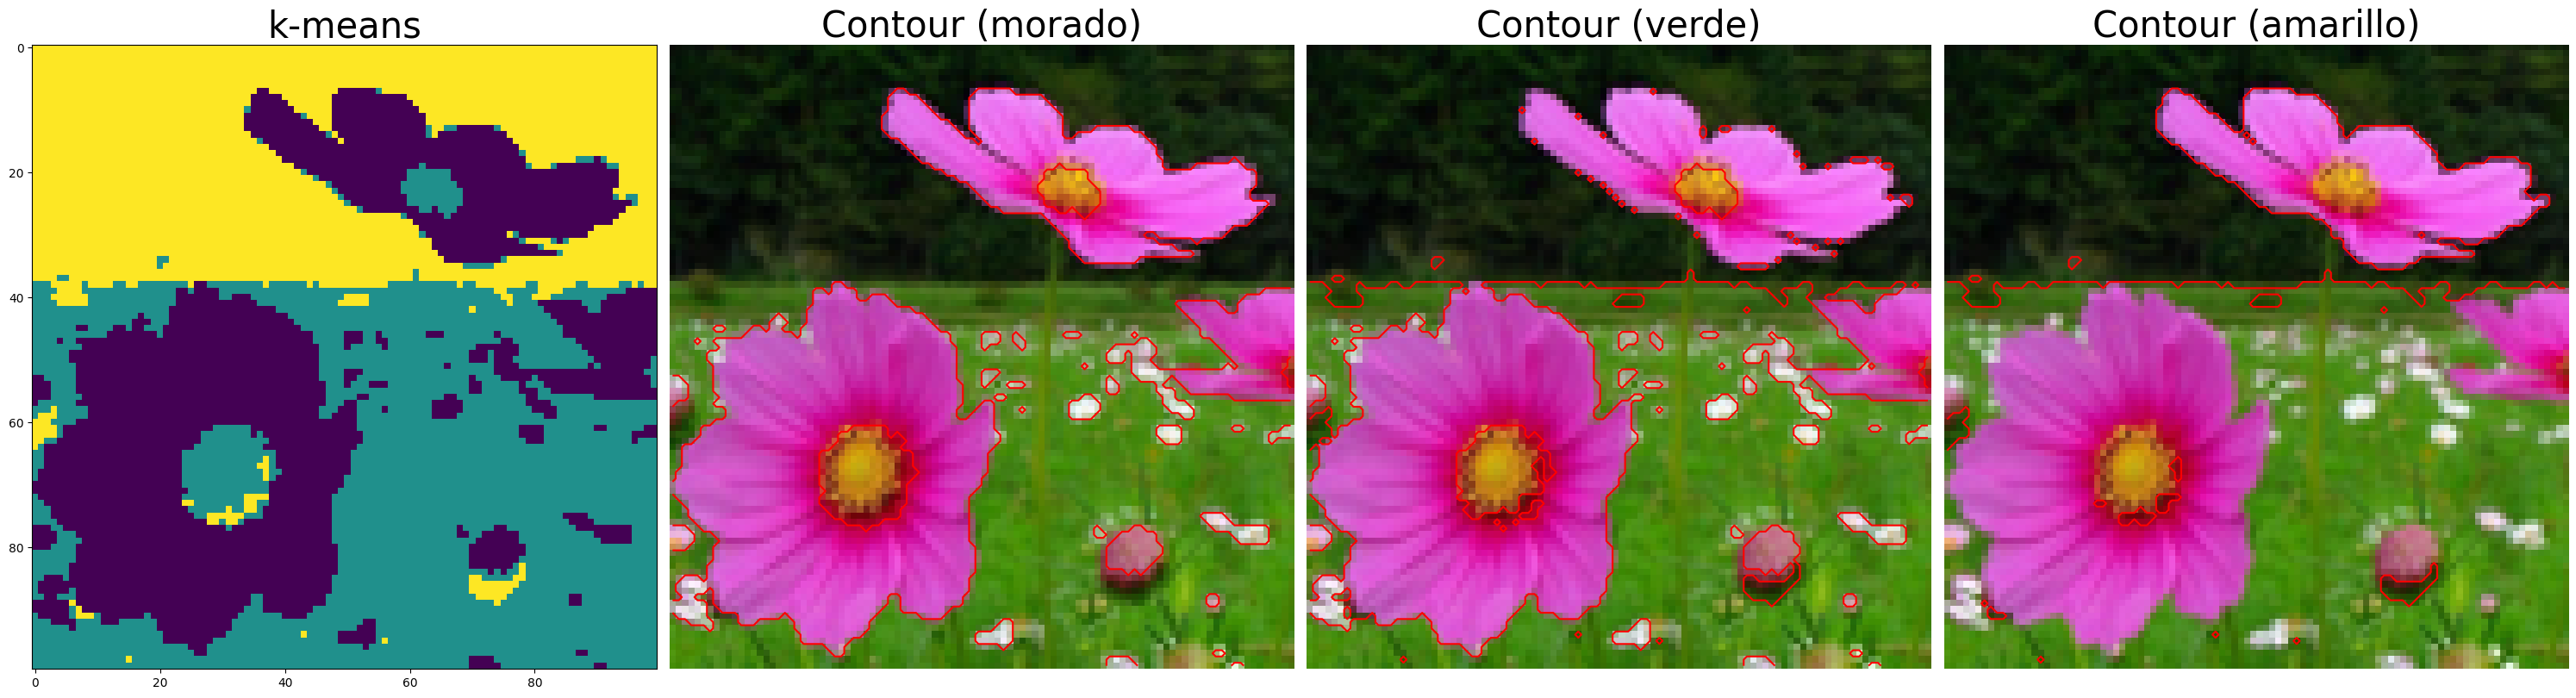

In [38]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10, n_init='auto')
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])

pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

In [39]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=100, random_state=10)
spectral.fit(X) 
y_pred = spectral.labels_.astype(int)

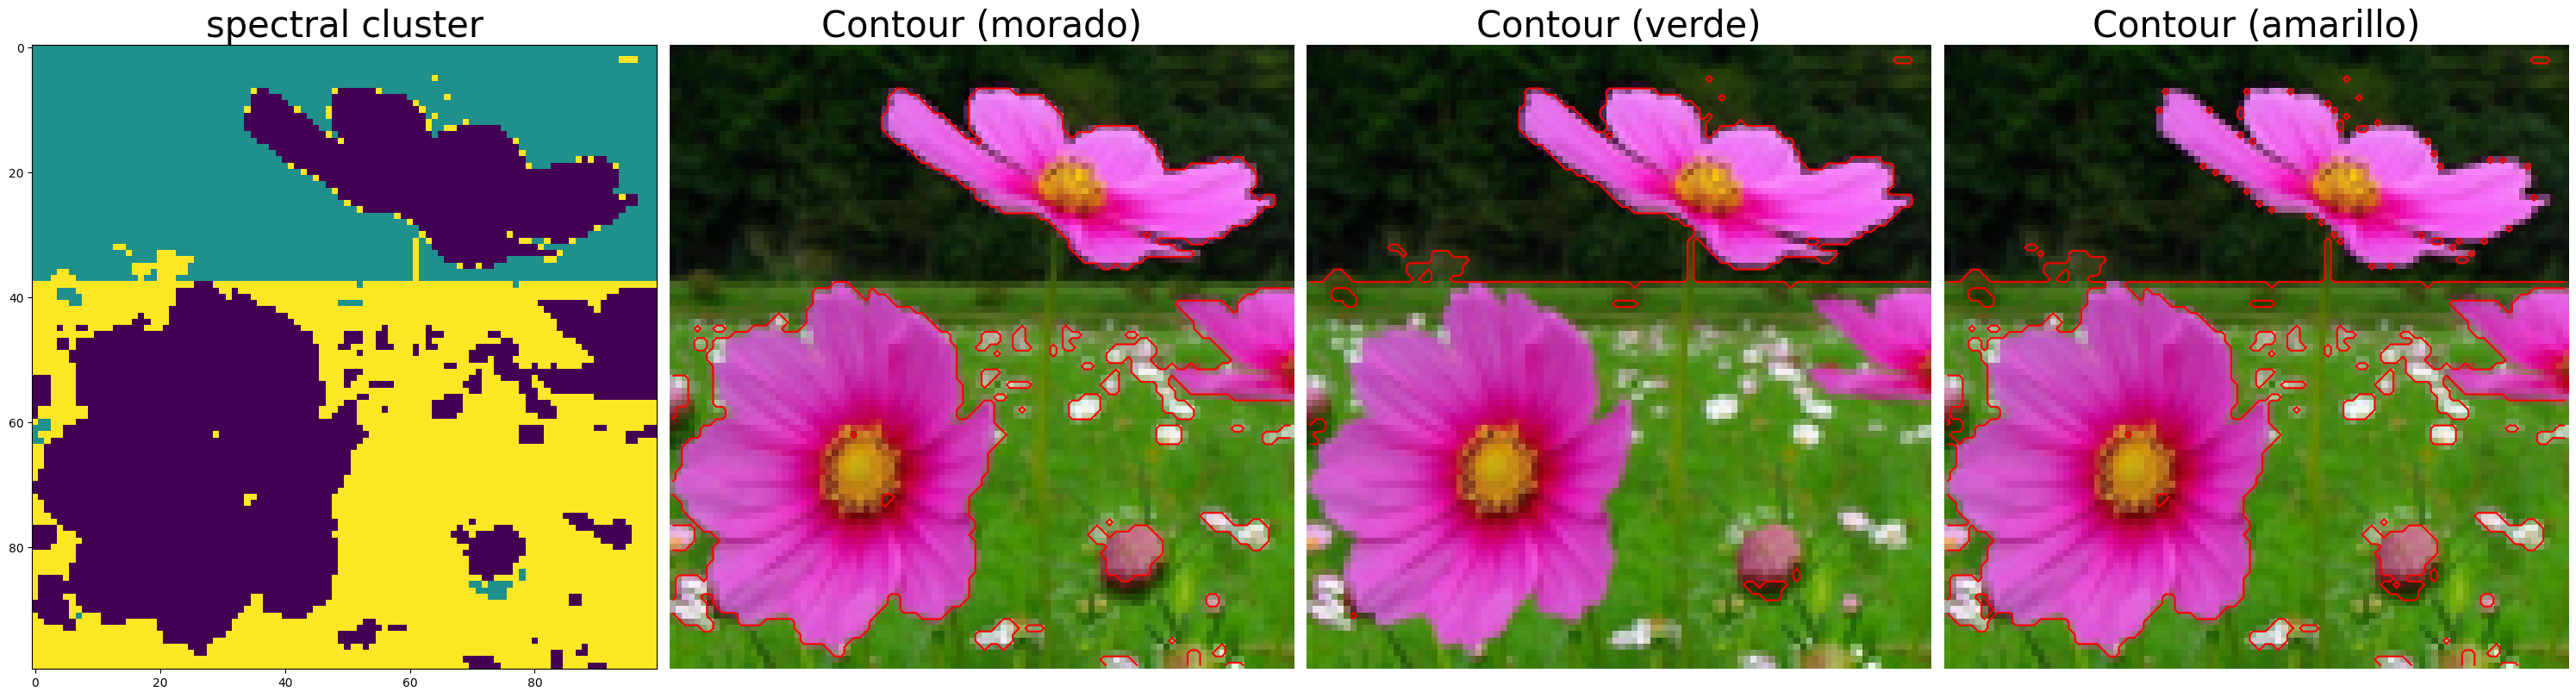

In [40]:
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('spectral cluster', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

## Spectral clustering e imágenes. Ejemplo 3

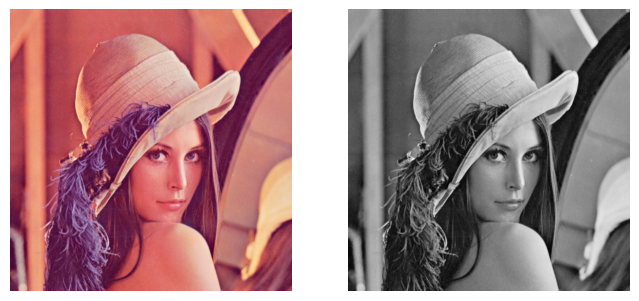

In [42]:
im_orig = imread('../data/lena.jpg')
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.axis('off')
pylab.imshow(im_orig)
pylab.subplot(122)
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray);

In [43]:
resized_im = Image.fromarray(imread('../data/lena.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

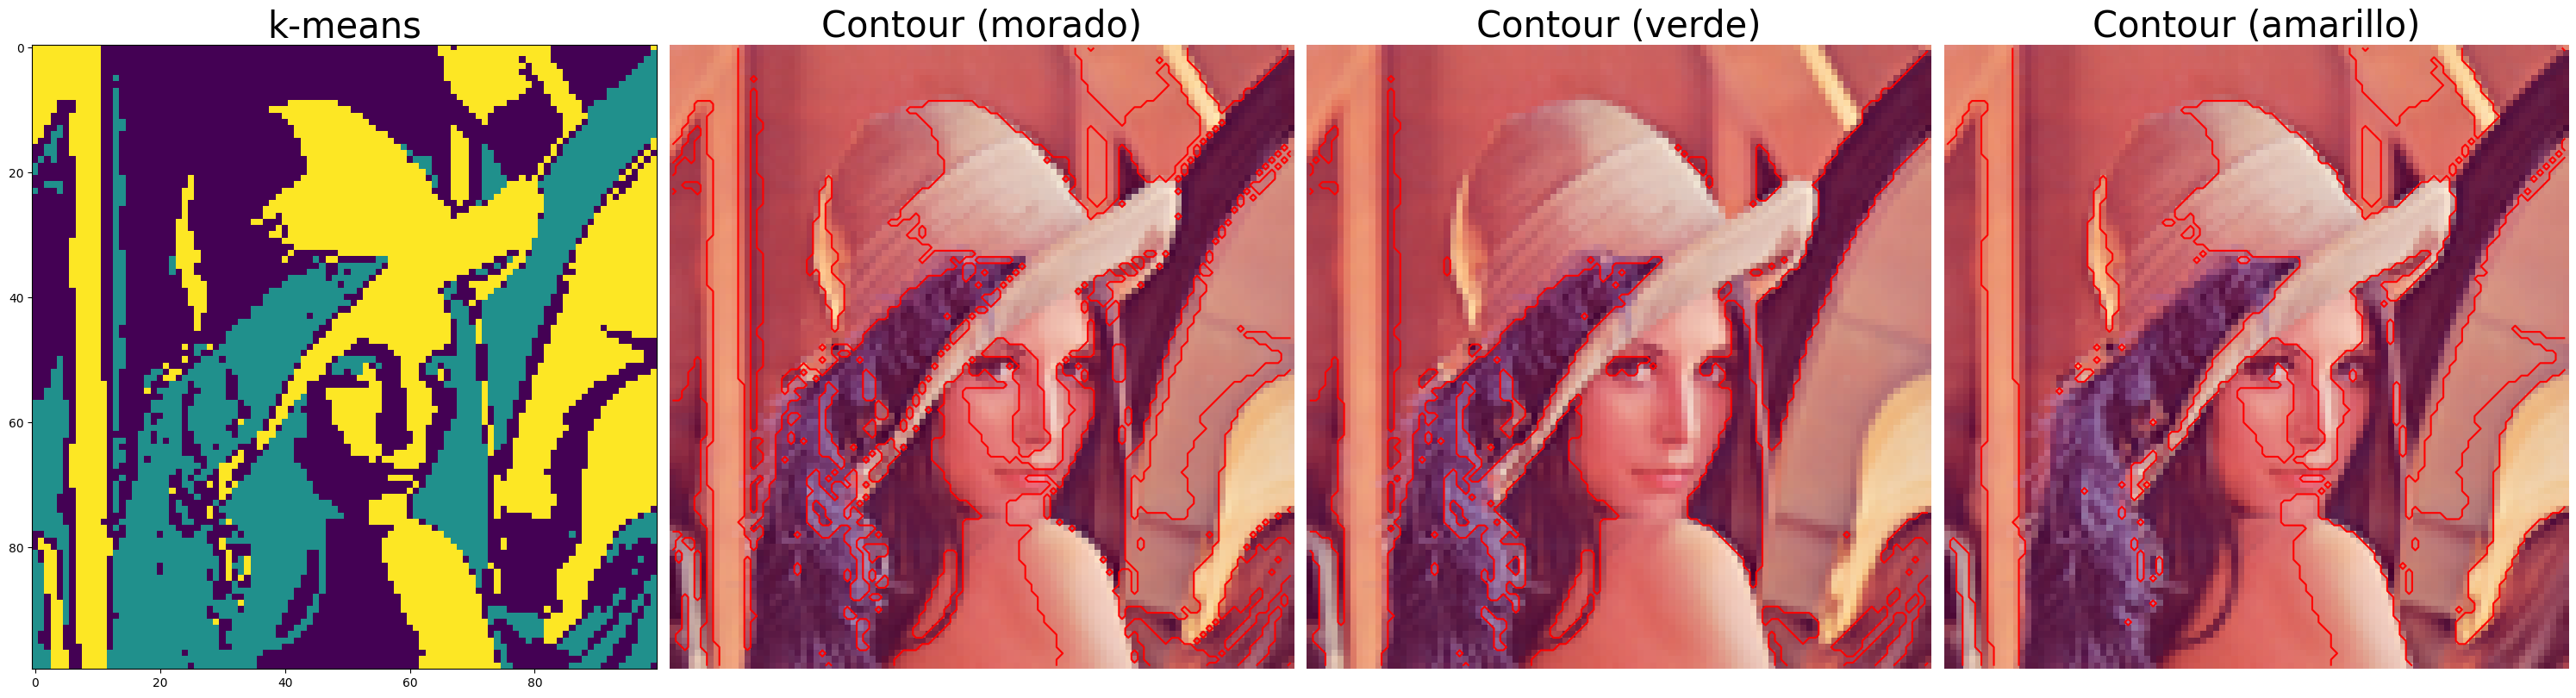

In [45]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=0, n_init='auto')
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

In [46]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=800, random_state=0)
spectral.fit(X) 
y_pred = spectral.labels_.astype(int)

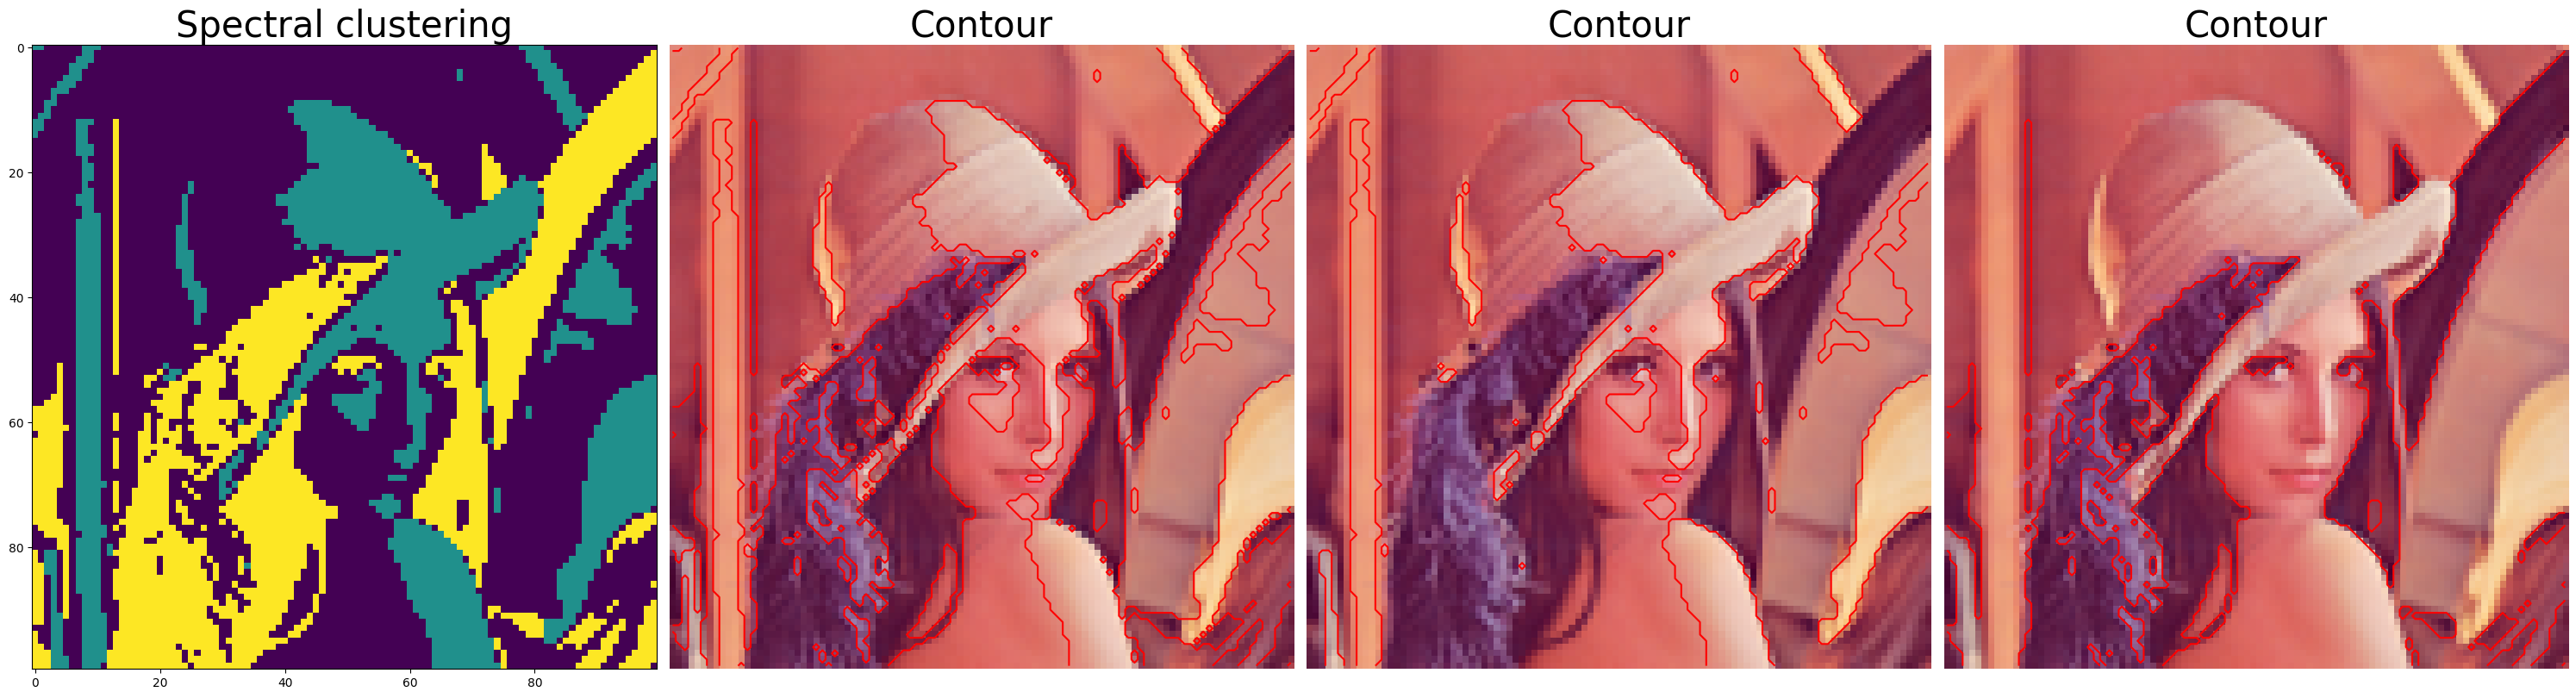

In [47]:
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('Spectral clustering', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.show()